To investigate time stepping errors I have been looking at the 1d linear advection equation, modified to include oscillatory behaviour. This is given in Equation 1.

\begin{align}
\frac{\partial \phi}{\partial t} + u \frac{\partial \phi}{\partial x} = iN \phi
\end{align}

For simplicity, the advecting velocity is set to zero, such that Equation 1 becomes:

\begin{align}
\frac{\partial \phi}{\partial t} = iN \phi
\end{align}

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

os.chdir("..")
import pythonCode.plotters as plotters
import pythonCode.helpers as helpers
import pythonCode.analyticalSolutions as analy
from pythonCode.sourceterms import PsiParameters

I now change the timestep resolution from $\Delta t=50s$ to $\Delta t=0.1s$ (see cell below). No advection so don't need to worry about stability.

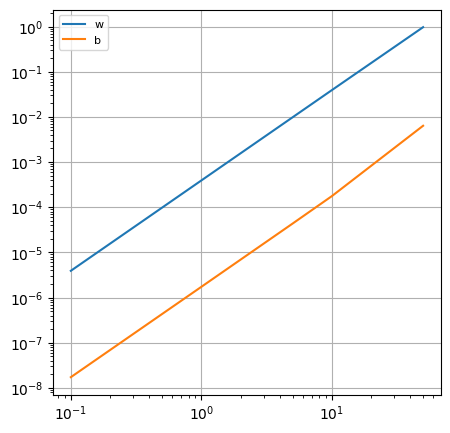

In [2]:
    # Setup solver.
    params = PsiParameters()
    params.N = 0.005
    endtime = 2500
    dt = 0.1
    u = 0.
    solver = helpers.setupSolver(xbounds=[0, 12], dx=10e-2, 
                                  endtime=endtime, dt=dt, schemeKey=1, 
                                  sPhiCoeffFlag=True, sFuncFlag=False,
                                  params=params)
    
    # Add analytical solution that will be evaluated each iteration.
    solver.addCustomEquation("analytic", analy.analyticalSolution1, 
                              args=(helpers.middleWaveIC, u, solver),
                              store=False)
        
    dts = np.array([50, 10, 5, 1, 0.5, 0.1])
    x0, xL = solver.model.grid.xbounds
    
    errorsIm = np.zeros_like(dts)
    errorsRe = np.zeros_like(dts)

    # Iterate through the different time resolutions.
    for i, dti in enumerate(dts):
                
        # Reset Initial condition.
        solver.model.grid.phi = helpers.setInitialCondition("a1", solver)
            
        # Change the timestep.
        solver.setNewTimestep(dti, endtime)
        
        # Run the solver.
        solver.run(u)
        
        ## Calculate error ##
        phiA = solver.getCustomData("analytic")
        phiN = solver.model.grid.phi
        
        errorsIm[i] = helpers.l2(phiN.imag, phiA.imag, solver.dt)
        errorsRe[i] = helpers.l2(phiN.real, phiA.real, solver.dt)
        
    # Plot the l2 errors.
    plt.figure(figsize=(5, 5))
    plt.plot(dts, errorsIm, label="w")
    plt.plot(dts, errorsRe, label="b")
    plt.yscale("log")
    plt.xscale("log")
    plt.legend(fontsize=8)
    plt.grid()
    plt.show()
    plt.close()
    
    slope1, _ = np.polyfit(np.log(dts), np.log(errorsIm), 1)
    slope2, _ = np.polyfit(np.log(dts), np.log(errorsRe), 1)